# Placement Data Analysis
## Created by:
### Anuj Kapoor(18BCS6037)
### Shubhnoor Gill(18BCS6061)
### Argha Samanta(18BCS6065)
    Problem Statement
The Management wants you to analyse the placement data and give some insights to them like: What factors affect the package of the students the most, high CGPA results in high package etc

#Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Understanding

In [2]:
# Read file
df=pd.read_csv("/content/file1.csv")

In [3]:
# Display first 5 rows
df.head()

,Unnamed: 0,TPP Active 5th August 2019-6:15 PM,Current Course,College Name,Matric Percentage (Xth),Matric Year of Passing,Matric BOARD,XII Percentage %,Best of XII or Diploma,XIIth Stream,XII : Year of Passing,XII Board,Diploma %,Diploma : Branch,Diploma : Passing Year,Diploma : College Name & City,Diploma : Board,CGPA Till 6th Sem -20-July-2019,Backlogs,Graduation : Year of Passing,Graduation : Course,Graduation : Stream,Graduation : College,Graduation : University Name,PG CGPA till 2nd Sem - 31 May 2019,Backlogs.1,State,Catagory,Gender,Details Of Additional Course/certification,"Experience (if Any), Company Name","Experience (if Any), Designation","Experience (if Any), Salary (per Year [lpa])","Experience (if Any), Duration Of Work (years Or Months)",Training Done At (write Company/institute Name),Training Location (city),Duration,Project Title (during 6 Week/1-2 Months),Project Software/language Name,BEST of E,BEST of Q,BEST of L,BEST of Write-X,BEST of CP,BEST of Domain,BEST of Automata,AGE,Company Name,Package From (in LPA),Package To (in LPA),Status
0,0,Yes,B.E - CSE,University Institute of Engineering (UIE),84.0,2013,Rajasthan board of secondary education,84.2,84.2,Non - Medical,2015.0,Rajasthan board of secondary education,NaN,NaN,NaN,NaN,NaN,7.96,0,2020,B.E,B.E - CSE,Chandigarh University,Chandigarh University,NaN,NaN,Rajasthan,General,Male,NaN,NaN,NaN,NaN,NaN,Excellence Technology,NaN,NaN,NaN,NaN,580,840,675,540,735,562,95,22,ZS Associates India Pvt. Ltd,6.53,6.53,On Campus
1,1,Yes,B.E - CSE,University Institute of Engineering (UIE),81.7,2014,CBSE,81.8,81.8,Non - Medical,2016.0,CBSE,NaN,NaN,NaN,NaN,NaN,7.80,0,2020,B.E,B.E - CSE,Chandigarh University,Chandigarh University,NaN,NaN,Punjab,SC,Female,Na,NaN,NaN,NaN,NaN,"Cdac , Mohali",Chandhigarh,Six Weeks,Fta Application,Android Studio/android,465,490,495,540,495,592,53,21,Nokia,3.00,3.00,On Campus
2,2,Yes,B.E - CSE,University Institute of Engineering (UIE),95.0,2013,CBSE,76.2,76.2,Non - Medical,2015.0,CBSE,NaN,NaN,NaN,NaN,NaN,8.43,0,2020,B.E,B.E - CSE,Chandigarh University,Chandigarh University,NaN,NaN,Delhi(nct),General,Male,Cloud Computing,NaN,NaN,NaN,NaN,Ibm-kvch,Noida,Six Weeks,Hosting A Chatting Website,"Cloud Computing, Aws, Php",665,680,565,540,665,531,61,23,Verizon Data,5.52,5.52,On Campus
3,3,Yes,B.E - CSE,University Institute of Engineering (UIE),87.4,2013,CBSE,86.4,86.4,Non - Medical,2015.0,CBSE,NaN,NaN,NaN,NaN,NaN,8.36,0,2020,B.E,B.E - CSE,Chandigarh University,Chandigarh University,NaN,NaN,Uttar Pradesh,General,Male,NaN,NaN,NaN,NaN,NaN,C-dac,Mohali,Six Weeks,Hotel Predictions,Bigdata,560,650,555,540,545,469,50,23,ZS Associates India Pvt. Ltd,6.53,6.53,On Campus
4,4,Yes,B.E - CSE,University Institute of Engineering (UIE),89.4,2013,Himachal Pradesh Board,80.6,80.6,Non - Medical,2015.0,Himachal Pradesh Board,NaN,NaN,NaN,NaN,NaN,8.05,0,2020,B.E,B.E - CSE,Chandigarh University,Chandigarh University,NaN,NaN,Himachal Pradesh,General,Male,NaN,NaN,NaN,NaN,NaN,A2it Mohali,Mohali,Six Weeks,Fitness Buddy,Android Studio With Sql,605,650,545,180,515,531,19,22,Capgemini,3.80,3.80,On Campus


    Data Description

In [4]:
#data description
df.describe()

,Unnamed: 0,Matric Percentage (Xth),Matric Year of Passing,XII Percentage %,Best of XII or Diploma,XII : Year of Passing,Diploma %,Diploma : Passing Year,CGPA Till 6th Sem -20-July-2019,Backlogs,PG CGPA till 2nd Sem - 31 May 2019,Backlogs.1,BEST of E,BEST of Q,BEST of L,BEST of Write-X,BEST of CP,BEST of Domain,BEST of Automata,AGE,Package From (in LPA),Package To (in LPA)
count,1031.000000,1031.000000,1031.00000,1017.000000,1031.000000,1014.000000,16.000000,16.000000,1031.000000,1031.000000,0.0,0.0,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,515.000000,83.408923,2013.56838,76.707414,76.634442,2015.623274,69.654375,2016.750000,7.384966,0.174588,NaN,NaN,613.525703,624.859360,565.310378,539.476237,535.870999,490.347236,32.827352,21.318138,4.109612,4.414403
std,297.768366,8.557651,0.59196,9.981934,9.969490,0.547894,9.166064,0.447214,0.762399,0.893653,NaN,NaN,78.127100,130.110127,72.177644,105.969941,93.218086,79.681305,29.193550,4.010381,2.403518,2.588476
min,0.000000,48.500000,2010.00000,47.800000,49.800000,2012.000000,49.800000,2016.000000,3.960000,0.000000,NaN,NaN,370.000000,240.000000,265.000000,180.000000,255.000000,254.000000,0.000000,1.000000,1.580000,1.740000
25%,257.500000,77.900000,2013.00000,69.200000,69.000000,2015.000000,61.900000,2016.750000,6.940000,0.000000,NaN,NaN,560.000000,550.000000,520.000000,540.000000,465.000000,438.000000,3.000000,21.000000,3.000000,3.250000
50%,515.000000,83.600000,2014.00000,76.600000,76.400000,2016.000000,71.250000,2017.000000,7.460000,0.000000,NaN,NaN,615.000000,635.000000,570.000000,540.000000,535.000000,500.000000,28.000000,22.000000,3.500000,3.800000
75%,772.500000,89.760000,2014.00000,85.000000,85.000000,2016.000000,75.750000,2017.000000,7.950000,0.000000,NaN,NaN,665.000000,710.000000,615.000000,540.000000,605.000000,531.000000,50.000000,22.000000,4.250000,4.650000
max,1030.000000,100.000000,2016.00000,98.300000,98.300000,2016.000000,81.550000,2017.000000,9.120000,14.000000,NaN,NaN,865.000000,900.000000,725.000000,900.000000,785.000000,777.000000,100.000000,37.000000,28.750000,28.750000


       Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 51 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               1031 non-null   int64  
 1   TPP Active 5th August 2019-6:15 PM                       1031 non-null   object 
 2   Current Course                                           1031 non-null   object 
 3   College Name                                             1031 non-null   object 
 4   Matric Percentage (Xth)                                  1031 non-null   float64
 5   Matric Year of Passing                                   1031 non-null   int64  
 6   Matric BOARD                                             1031 non-null   object 
 7   XII Percentage %                                         1017 non-null   float64
 8   Best of XII or Diploma      

    Checking for null values

In [6]:
df.isnull().sum()

Unnamed: 0                                                    0
TPP Active 5th August 2019-6:15 PM                            0
Current Course                                                0
College Name                                                  0
Matric Percentage (Xth)                                       0
Matric Year of Passing                                        0
Matric BOARD                                                  0
XII Percentage %                                             14
Best of XII or Diploma                                        0
XIIth Stream                                                 16
XII : Year of Passing                                        17
XII Board                                                    19
Diploma %                                                  1015
Diploma : Branch                                           1015
Diploma : Passing Year                                     1015
Diploma : College Name & City           

    Data Shape

In [7]:
df.shape

(1031, 51)

#Data Preprocessing

    Drop the insignificant features

In [8]:
df = df.drop('PG CGPA till 2nd Sem - 31 May 2019', axis=1)
df = df.drop('Backlogs.1', axis=1)
df = df.drop('TPP Active 5th August 2019-6:15 PM', axis=1)
df = df.drop('Current Course', axis=1)

    Check the unique values

In [9]:
df['College Name'].unique()

array(['University Institute of Engineering (UIE)',
       'Apex Institute of Technology (AIT)'], dtype=object)

In [10]:
df = df.drop('College Name', axis=1)
df = df.drop('XII Percentage %', axis=1)

In [11]:
df['XIIth Stream'].unique()

array(['Non - Medical', 'Non - Medical with Biology', 'Other', 'Medical',
       nan], dtype=object)

In [12]:
df = df.drop('XIIth Stream', axis=1)
df = df.drop('XII Board', axis=1)
df = df.drop('XII : Year of Passing', axis=1)
df = df.drop('Matric Year of Passing', axis=1)
df = df.drop('Diploma %', axis=1)
df = df.drop('Diploma : Branch', axis=1)
df = df.drop('Diploma : Passing Year', axis=1)
df = df.drop('Diploma : College Name & City', axis=1)
df = df.drop('Diploma : Board', axis=1)
df = df.drop('Backlogs', axis=1)
df = df.drop('Graduation : Year of Passing', axis=1)
df = df.drop('Graduation : Course', axis=1)
df = df.drop('Graduation : Stream', axis=1)
df = df.drop('Graduation : College', axis=1)
df = df.drop('Graduation : University Name', axis=1)
df = df.drop(['State','Catagory'],axis=1)

    Converting the variables into binary categories(0/1)

In [13]:
df['Details Of Additional Course/certification'].loc[~df['Details Of Additional Course/certification'].isnull()] = 1  # not nan
df['Details Of Additional Course/certification'].loc[df['Details Of Additional Course/certification'].isnull()] = 0 
df['Details Of Additional Course/certification'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


array([0, 1], dtype=object)

In [14]:
df['Details Of Additional Course/certification'].head()

0    0
1    1
2    1
3    0
4    0
Name: Details Of Additional Course/certification, dtype: object

In [15]:
df = df.drop(['Experience (if Any), Company Name','Experience (if Any), Company Name','Experience (if Any), Designation'], axis=1)

In [16]:
df = df.drop('Experience (if Any), Salary (per Year [lpa])',axis=1)
df = df.drop('Experience (if Any), Duration Of Work (years Or Months)',axis=1)
df = df.drop('Training Done At (write Company/institute Name)',axis=1)
df = df.drop('Training Location (city)',axis=1)
df = df.drop('Duration',axis=1)
df = df.drop('Project Software/language Name',axis=1)
df = df.drop('AGE',axis=1)
df = df.drop('Matric BOARD',axis=1)
df = df.drop('Unnamed: 0',axis=1)

In [17]:
pd.value_counts(df.Status)

On Campus     1028
Off Campus       3
Name: Status, dtype: int64

In [18]:
df.isnull().sum()

Matric Percentage (Xth)                         0
Best of XII or Diploma                          0
CGPA Till 6th Sem -20-July-2019                 0
Gender                                          0
Details Of Additional Course/certification      0
Project Title (during 6 Week/1-2 Months)      125
BEST of E                                       0
BEST of Q                                       0
BEST of L                                       0
BEST of Write-X                                 0
BEST of CP                                      0
BEST of Domain                                  0
BEST of Automata                                0
Company Name                                    0
Package From (in LPA)                           0
Package To (in LPA)                             0
Status                                          0
dtype: int64

    Renaming the columns

In [19]:
df.rename(columns={'Matric Percentage (Xth)': '10th', 'Best of XII or Diploma': '12th or Diploma'}, inplace=True)
df.rename(columns={'CGPA Till 6th Sem -20-July-2019': 'CGPA', 'Details Of Additional Course/certification': 'Certification'}, inplace=True)
df.rename(columns={'Project Title (during 6 Week/1-2 Months)': 'Project Title'}, inplace=True)

In [20]:
df.isnull().sum()

10th                       0
12th or Diploma            0
CGPA                       0
Gender                     0
Certification              0
Project Title            125
BEST of E                  0
BEST of Q                  0
BEST of L                  0
BEST of Write-X            0
BEST of CP                 0
BEST of Domain             0
BEST of Automata           0
Company Name               0
Package From (in LPA)      0
Package To (in LPA)        0
Status                     0
dtype: int64

#Placement Data Analysis

    Display the first five rows

In [21]:
df.head()

,10th,12th or Diploma,CGPA,Gender,Certification,Project Title,BEST of E,BEST of Q,BEST of L,BEST of Write-X,BEST of CP,BEST of Domain,BEST of Automata,Company Name,Package From (in LPA),Package To (in LPA),Status
0,84.0,84.2,7.96,Male,0,NaN,580,840,675,540,735,562,95,ZS Associates India Pvt. Ltd,6.53,6.53,On Campus
1,81.7,81.8,7.80,Female,1,Fta Application,465,490,495,540,495,592,53,Nokia,3.00,3.00,On Campus
2,95.0,76.2,8.43,Male,1,Hosting A Chatting Website,665,680,565,540,665,531,61,Verizon Data,5.52,5.52,On Campus
3,87.4,86.4,8.36,Male,0,Hotel Predictions,560,650,555,540,545,469,50,ZS Associates India Pvt. Ltd,6.53,6.53,On Campus
4,89.4,80.6,8.05,Male,0,Fitness Buddy,605,650,545,180,515,531,19,Capgemini,3.80,3.80,On Campus


In [22]:
ax=pd.DataFrame({'10th':df['10th'],'12th':df['12th or Diploma']})
ax.head()

,10th,12th
0,84.0,84.2
1,81.7,81.8
2,95.0,76.2
3,87.4,86.4
4,89.4,80.6


    Checking Relationship between 10th and 12th marks

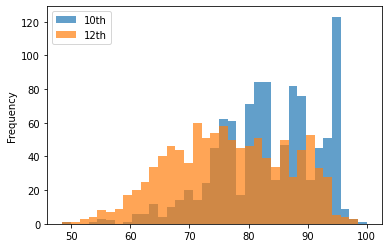

In [23]:
ax.plot.hist(bins=35,alpha=0.7)

In [24]:
ax.corr()

,10th,12th
10th,1.000000,0.547079
12th,0.547079,1.000000


    Plot boxplots for 10th marks on the basis of gender

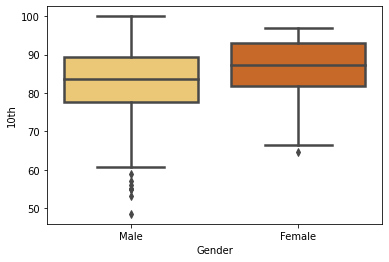

In [47]:
sns.boxplot(y="10th",x="Gender",palette="YlOrBr", data=df,linewidth=2.5)


    Plot boxplot Package on the basis of gender and status



### This shows that only the females were hired in off campus placements
### This plot also shows that the males were offered a higher package than females.

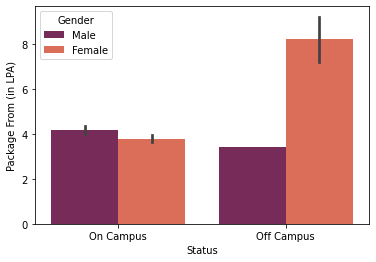

In [48]:
sns.barplot(y="Package From (in LPA)",x="Status",hue="Gender",palette="rocket", data=df)

    Calculating the average of Package from and Package To columns

In [49]:
package_mean=(df['Package From (in LPA)']+df['Package To (in LPA)'])/2

In [50]:
df['Package_Mean']=package_mean

    Checking Correlation between all the features

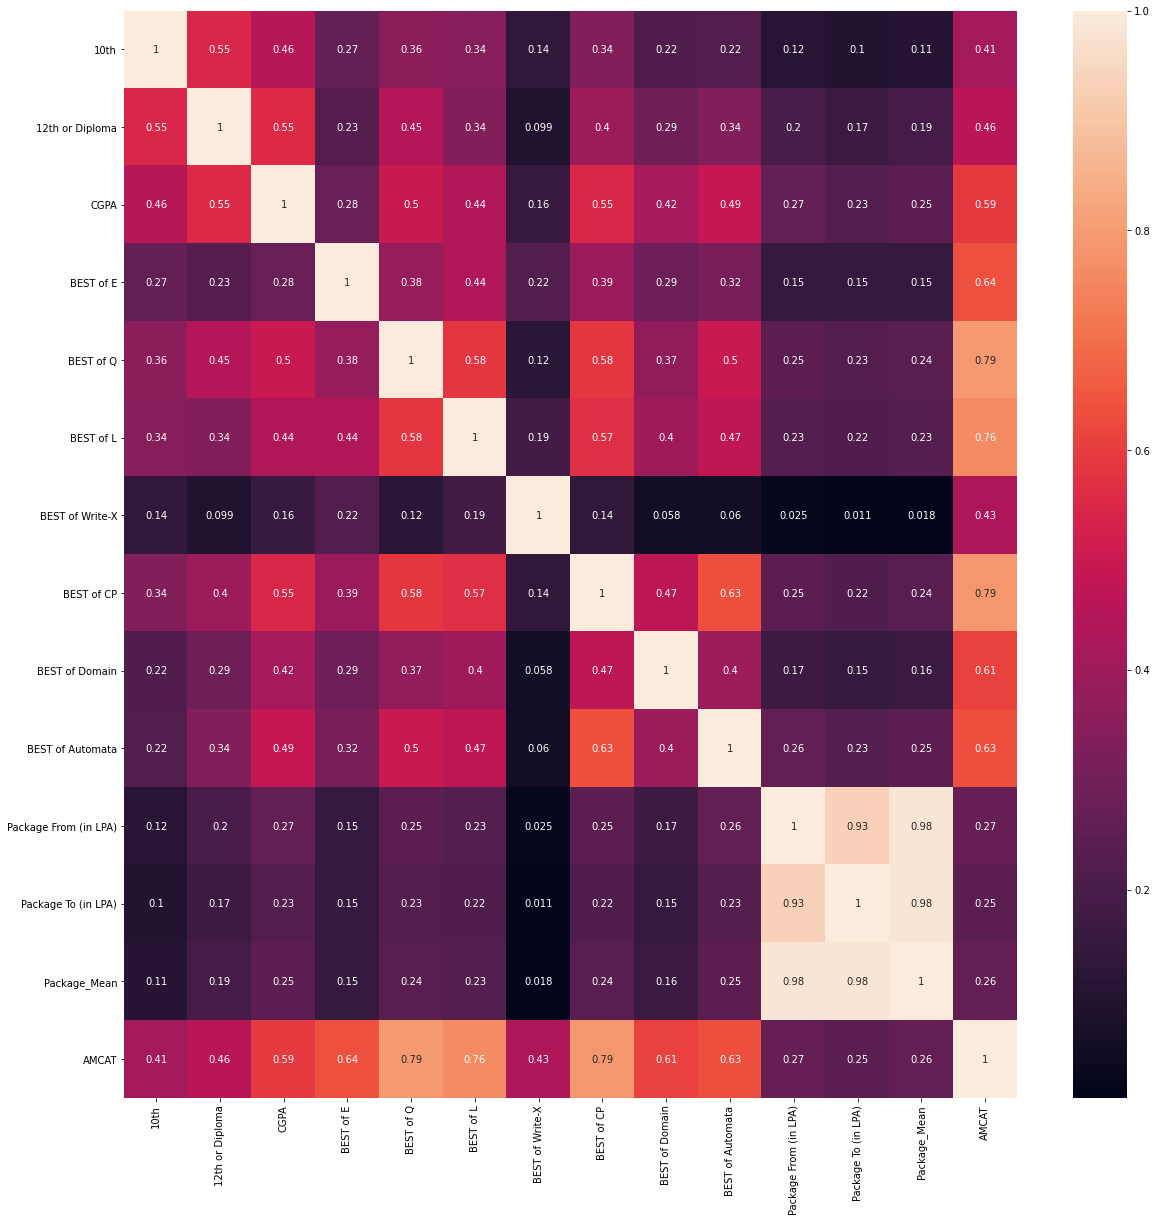

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

    Creating bins of package mean

In [52]:
cut_labels_4 = [1, 3, 5,7,10,15,20,25,30] # labelling the bins
cut_bins = [0, 1, 3, 5,7,10,15,20,25,30]
df['Package_bins'] = pd.cut(df['Package_Mean'], bins=cut_bins, labels=cut_labels_4)

In [53]:
df['Package_bins'] # Displaying the bins created

0       7
1       3
2       7
3       7
4       5
       ..
1026    5
1027    3
1028    5
1029    5
1030    5
Name: Package_bins, Length: 1031, dtype: category
Categories (9, int64): [1 < 3 < 5 < 7 ... 15 < 20 < 25 < 30]

In [54]:
df.columns #Checking columns of the dataset

Index(['10th', '12th or Diploma', 'CGPA', 'Gender', 'Certification',
       'Project Title', 'BEST of E', 'BEST of Q', 'BEST of L',
       'BEST of Write-X', 'BEST of CP', 'BEST of Domain', 'BEST of Automata',
       'Company Name', 'Package From (in LPA)', 'Package To (in LPA)',
       'Status', 'Package_Mean', 'Package_bins', 'AMCAT'],
      dtype='object')

In [55]:
df.dtypes # Checking dtypes of the dataset

10th                      float64
12th or Diploma           float64
CGPA                      float64
Gender                     object
Certification              object
Project Title              object
BEST of E                   int64
BEST of Q                   int64
BEST of L                   int64
BEST of Write-X             int64
BEST of CP                  int64
BEST of Domain              int64
BEST of Automata            int64
Company Name               object
Package From (in LPA)     float64
Package To (in LPA)       float64
Status                     object
Package_Mean              float64
Package_bins             category
AMCAT                     float64
dtype: object

    Creating a column of average of all the AMCAT scores

In [56]:
df['AMCAT']=(df['BEST of Automata']+
             df['BEST of CP']+
             df['BEST of Domain']+
             df['BEST of E']+
             df['BEST of L']+
             df['BEST of Q']+
            df['BEST of Write-X'])/7

    Plot the histplot for all the numerical variables against the Package Range

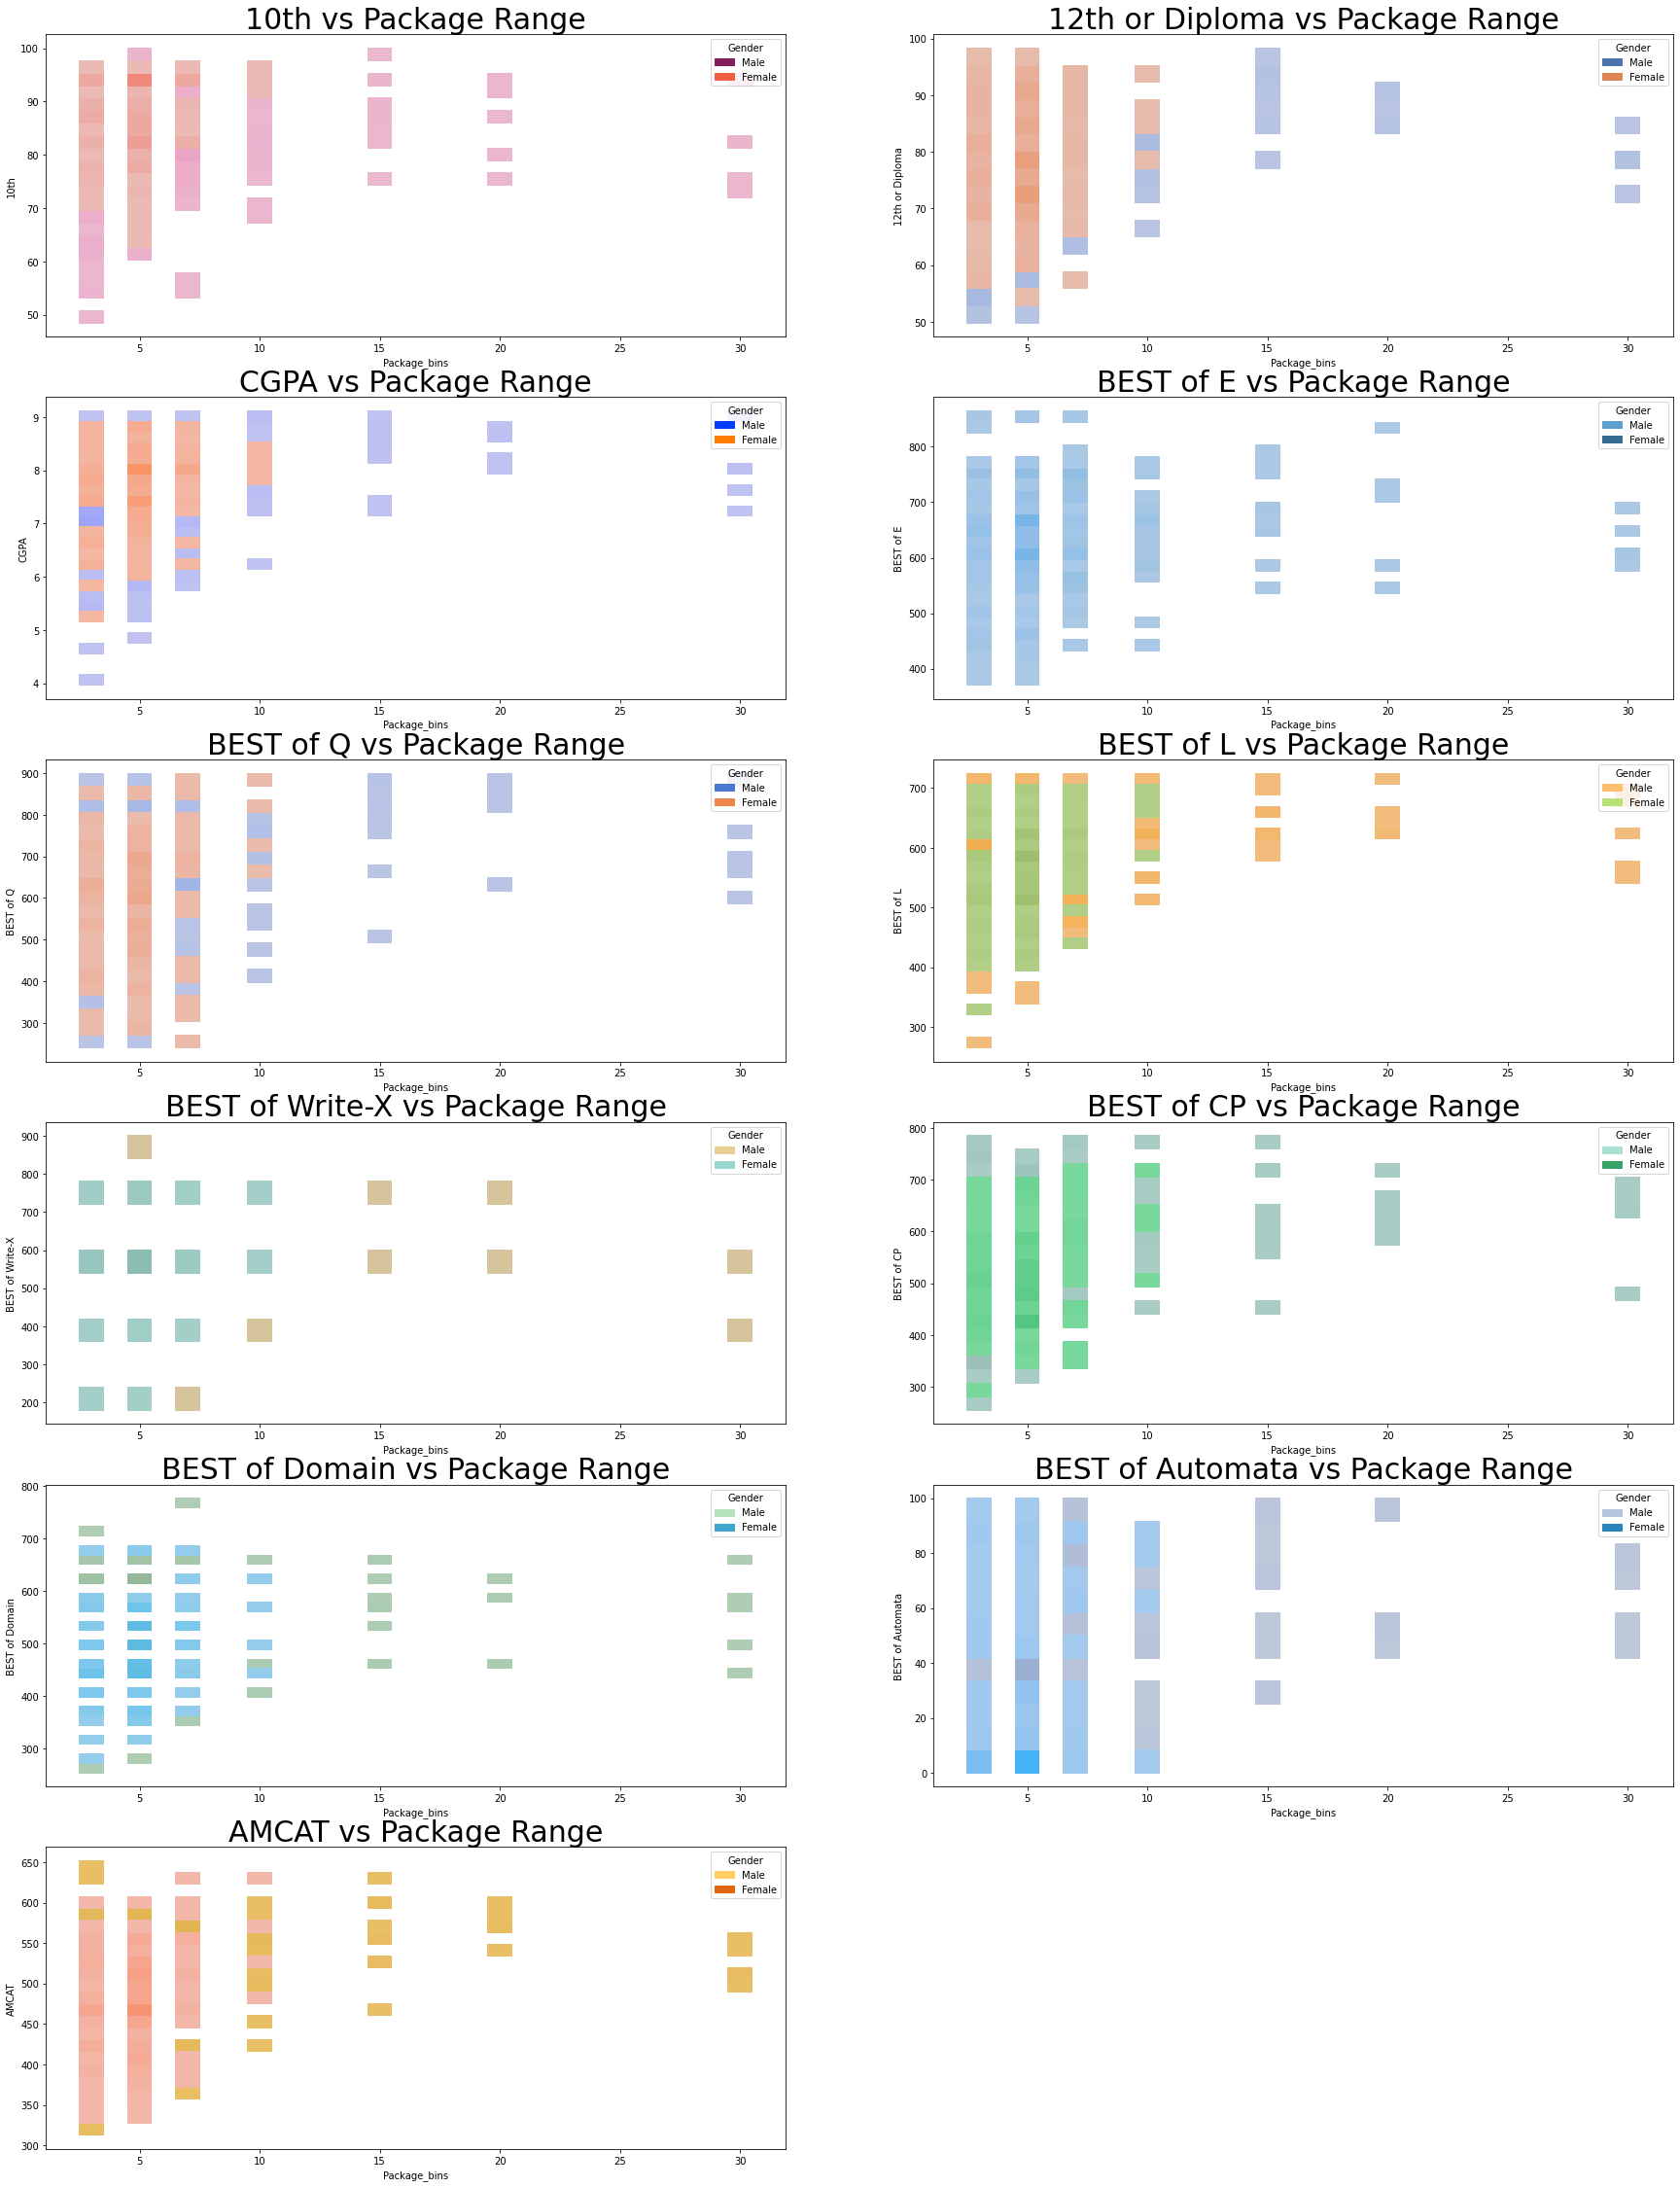

In [57]:
# Plot for numerical features
plt.figure(figsize=(30,40))
index=1
i=0
column=['10th', '12th or Diploma', 'CGPA', 'BEST of E', 'BEST of Q', 'BEST of L',
       'BEST of Write-X', 'BEST of CP', 'BEST of Domain', 'BEST of Automata','AMCAT']
color1=["rocket","deep","bright","Blues_d","muted","RdYlGn","BrBG","BuGn","GnBu","PuBu","YlOrBr"]
for col in df[column]:
  plt.subplot(6,2,index)
  title=col+" vs Package Range"
  plt.title(title,fontdict={'fontsize':30})
  g=sns.histplot(x="Package_bins",y=col,hue="Gender",palette=color1[i],data=df)
  index+=1
  i+=1

    Plot barplots for all numerical features against the Package Range

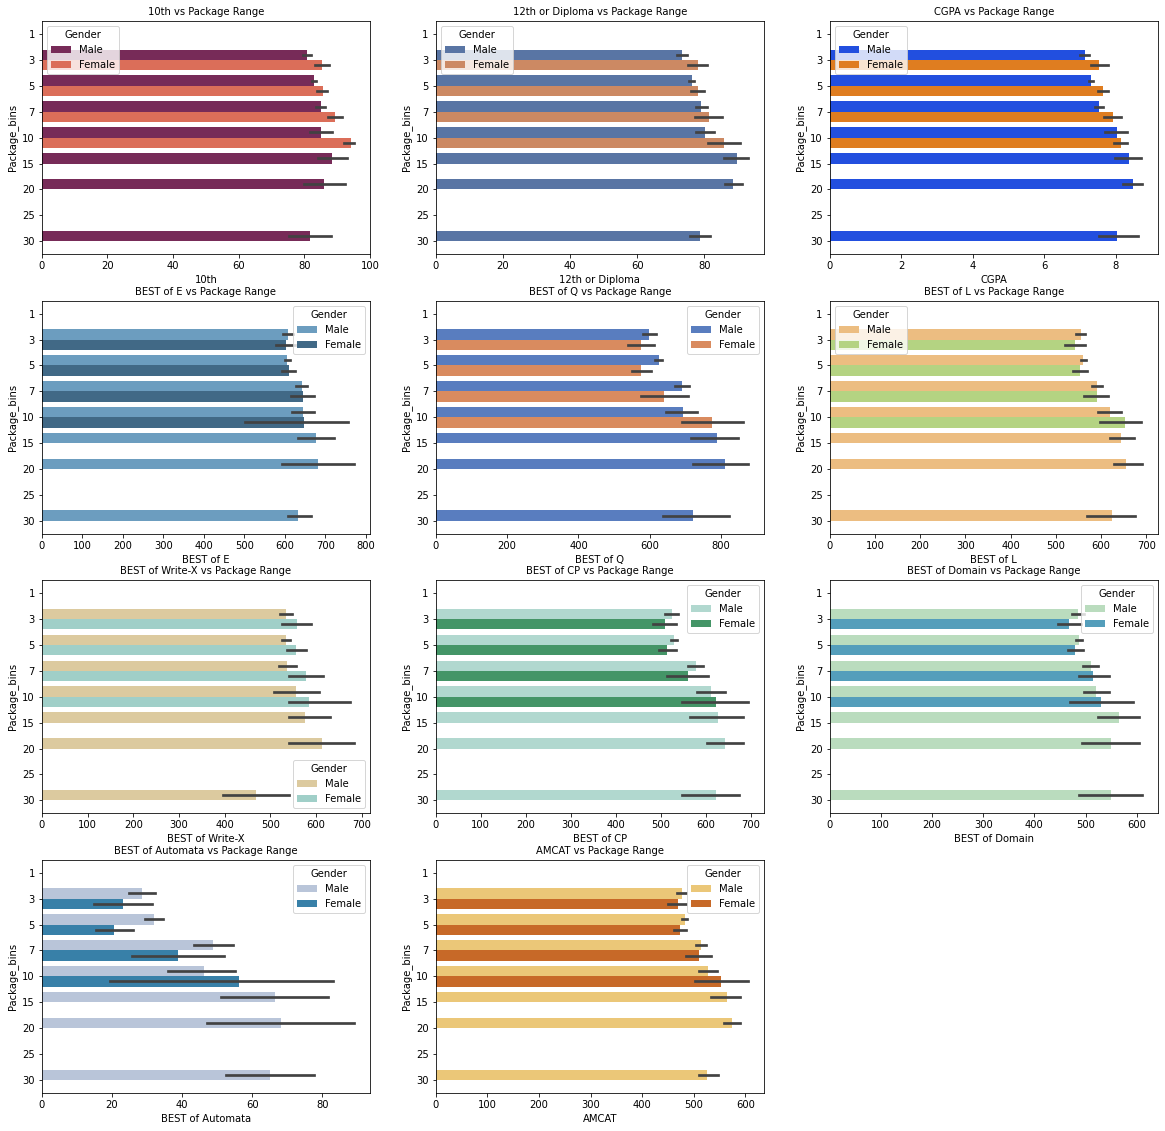

In [58]:
# Plot for numerical features
plt.figure(figsize=(20,30))
index=1
i=0
column=['10th', '12th or Diploma', 'CGPA', 'BEST of E', 'BEST of Q', 'BEST of L',
       'BEST of Write-X', 'BEST of CP', 'BEST of Domain', 'BEST of Automata','AMCAT']
color1=["rocket","deep","bright","Blues_d","muted","RdYlGn","BrBG","BuGn","GnBu","PuBu","YlOrBr"]
for col in df[column]:
  plt.subplot(6,3,index)
  title=col+" vs Package Range"
  plt.title(title,fontdict={'fontsize':10})
  sns.barplot(y='Package_bins',x=col,hue="Gender",palette=color1[i],data=df)
  index+=1
  i+=1

    Plot barplot of Package_Mean vs Gender

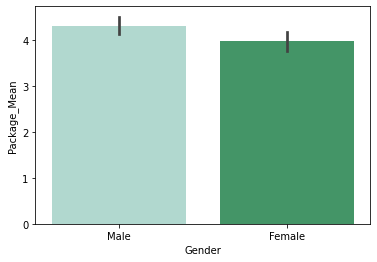

In [61]:
sns.barplot(y='Package_Mean',x="Gender",palette="BuGn",data=df)

    From the above plot we can analyse that the mean package for males was higher than females.

    Plot barplot for Package_Mean vs Certification on the basis of Gender
  

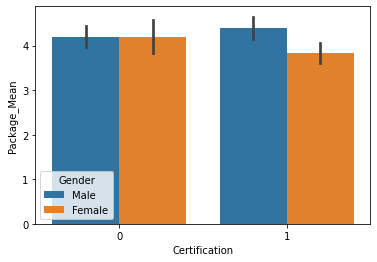

In [60]:
sns.barplot(y='Package_Mean',x="Certification",hue='Gender',data=df)

    We can analyse that students with or without certifications had almost the same package. 

# Thank You